In [1]:
library('tidyverse')
library('rvest')
library('lubridate')
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [3]:
df.marathon |> head()

year,name,country,time,race.time,MF,country.simple
<int>,<chr>,<chr>,<Period>,<dbl>,<chr>,<chr>
2022,Evans Chebet,Kenya,2H 6M 51S,2.114167,Men's,Kenya
2021,Benson Kipruto,Kenya,2H 9M 51S,2.164167,Men's,Kenya
2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia


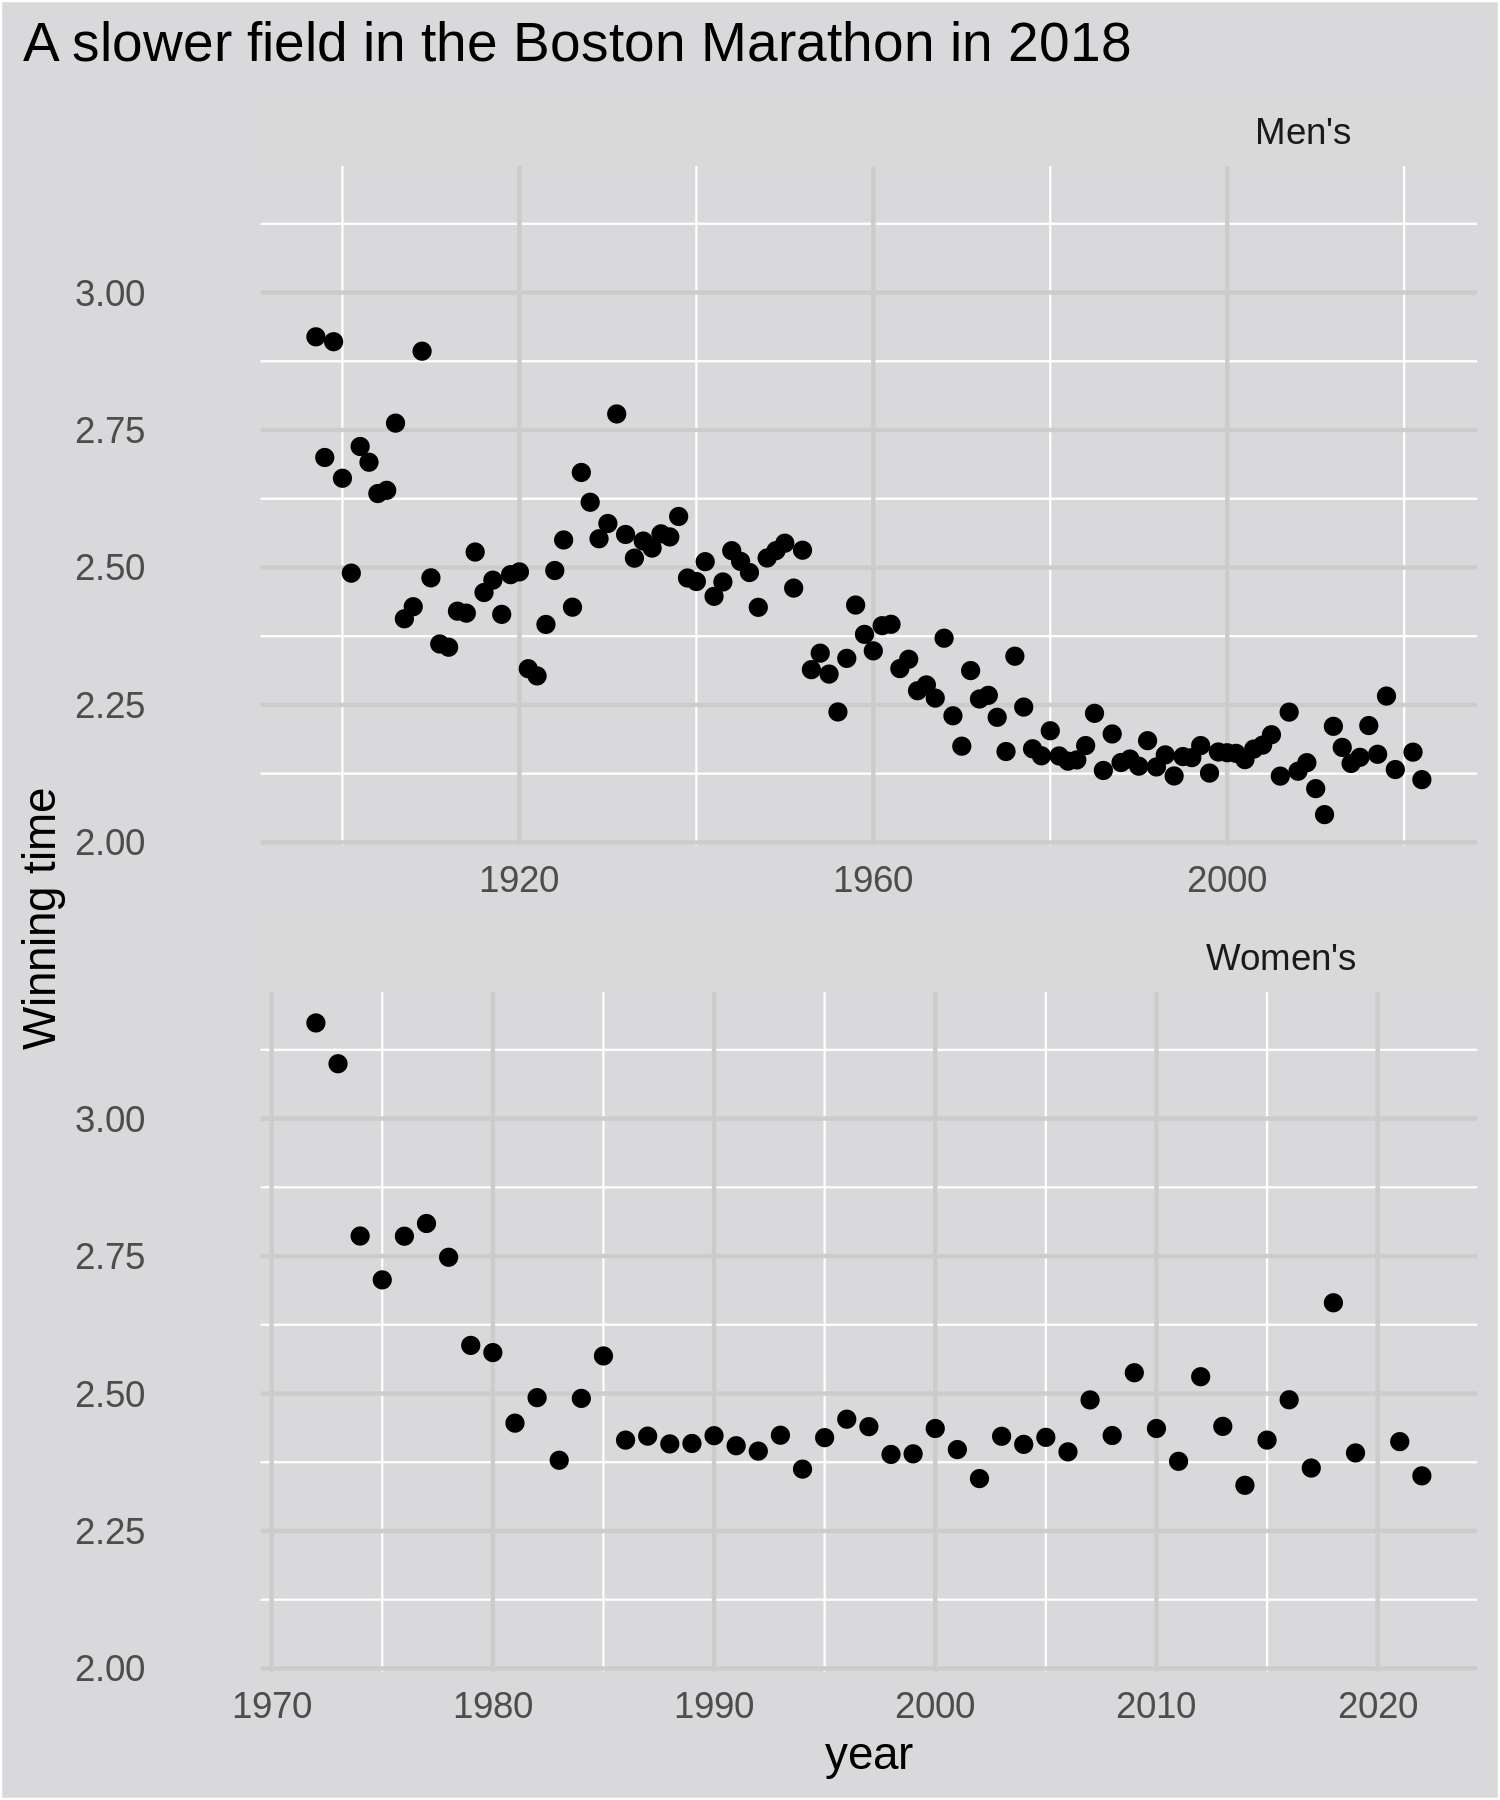

In [32]:
options(repr.plot.height = 6, repr.plot.width = 5)
p=ggplot(df.marathon, aes(x=year, y=race.time)) + geom_point() + facet_wrap(~MF, nrow=2, scales='free_x') + labs(y='Winning time') + 
labs(title='A slower field in the Boston Marathon in 2018')+
theme(strip.text = element_text(hjust=0.9),
      plot.title.position='plot', plot.background=element_rect(fill='#d9d9db'), 
      panel.background=element_rect(fill='#d9d9db'), 
      panel.grid.major=element_line(color='grey80'), 
      axis.ticks=element_blank(),
     axis.text.y=element_text(margin=margin(r=25)))


#scales='free_x' changes women x-axis
                                                                                                    

p

In [2]:
scrape_table = function(i, MF='Women\'s') {
    url = "https://www.baa.org/races/boston-marathon/results/champions"
    webpage = xml2::read_html(url)
    tbl = html_nodes(webpage, "table")[[i]] %>%
        html_table() %>%
        drop_na() %>%
        magrittr::set_colnames(c('year', 'name', 'country', 'time')) %>%
        mutate(time = hms(time)) %>%
        mutate(race.time = as.numeric(time, 'hours')) %>%
        mutate(MF = MF) %>%
        mutate(
            country.simple = ifelse(
                country %in% c('United States', 'Ethiopia', 'Japan', 'Kenya'),
                country,
                'other'
            )
        )
    tbl
}

df.men = scrape_table(1, MF='Men\'s')
df.women = scrape_table(2)

df.marathon = rbind(df.men, df.women)

Let's re-create this chart from FiveThirtyEight

In [40]:
country_names = data.frame(
    country = c('United States', 'Kenya', 'Japan', 'United States'),
    year = c(1915, 1955, 1990, 1975),
    race.time = c(2.75, 2.25, 2, 3),
    MF = c("Men's", "Men's", "Men's", "Women's")
)

country_names

country,year,race.time,MF
<chr>,<dbl>,<dbl>,<chr>
United States,1915,2.75,Men's
Kenya,1955,2.25,Men's
Japan,1990,2.00,Men's
United States,1975,3.00,Women's


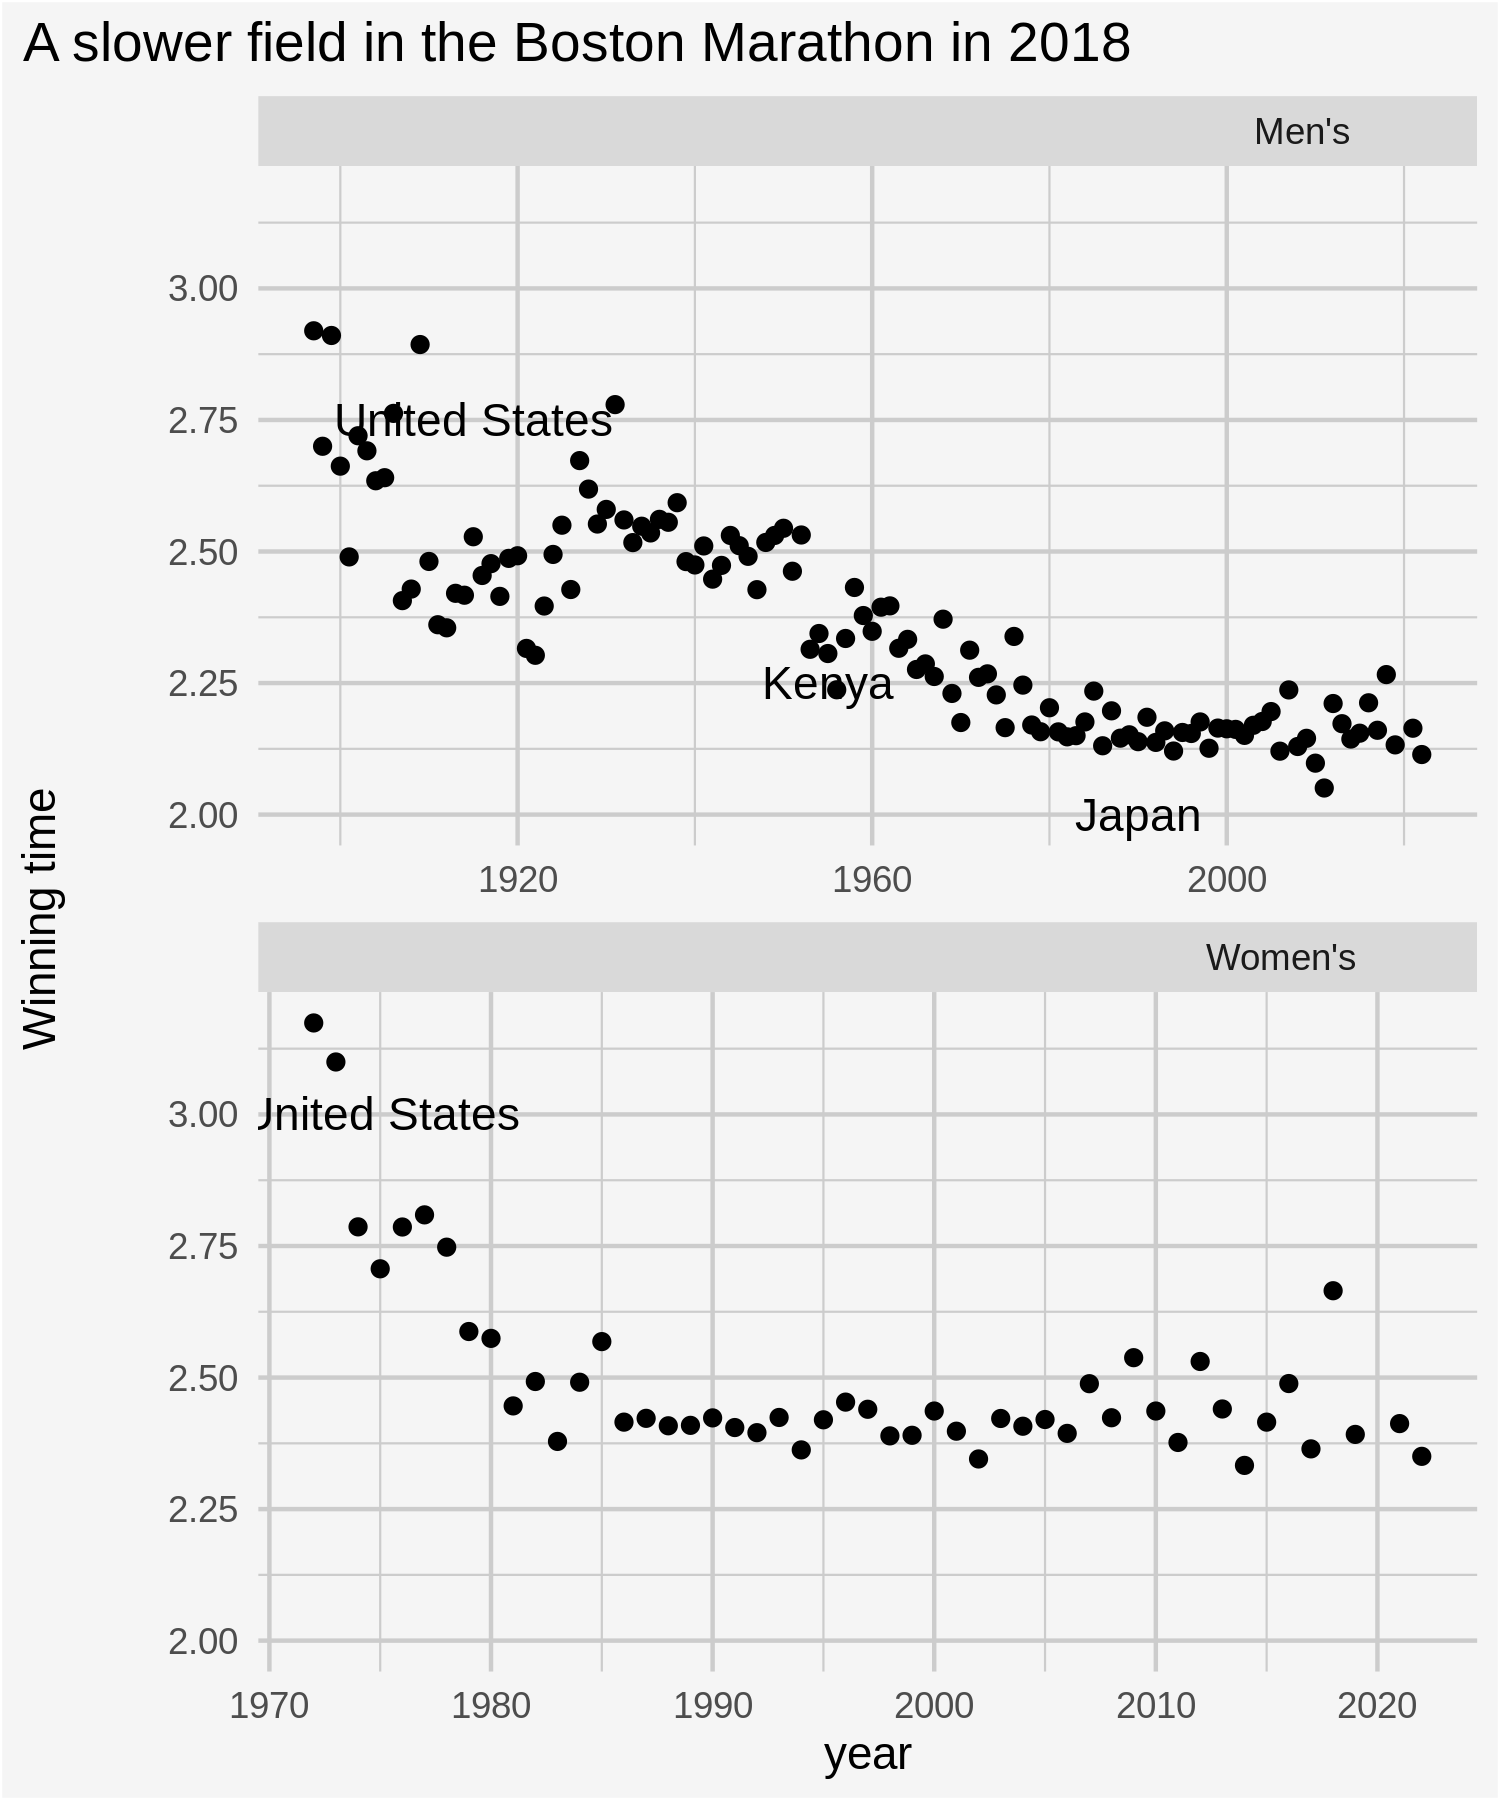

In [49]:
options(repr.plot.width = 5, repr.plot.height = 6)

p = ggplot(df.marathon, aes(x = year, y = race.time)) + 
    geom_point() +
    geom_text(data = country_names, aes(label = country)) +
    facet_wrap(~MF, ncol = 1, scales = 'free_x') +
    labs(title = 'A slower field in the Boston Marathon in 2018', y = 'Winning time') + 
    theme(strip.text = element_text(hjust = 0.9),
          plot.title.position = 'plot',
          plot.background = element_rect(fill = '#F5F5F5'),
          panel.background = element_rect(fill = '#F5F5F5'),
          panel.grid = element_line(color = 'grey80'),
          axis.ticks = element_blank(),
          axis.title.y = element_text(margin = margin(r = 25)))

p

In [50]:
winners_2018=df.marathon |> filter(year==2018)
winners_2018

year,name,country,time,race.time,MF,country.simple
<int>,<chr>,<chr>,<Period>,<dbl>,<chr>,<chr>
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2018,Desiree Linden,United States,2H 39M 54S,2.665000,Women's,United States


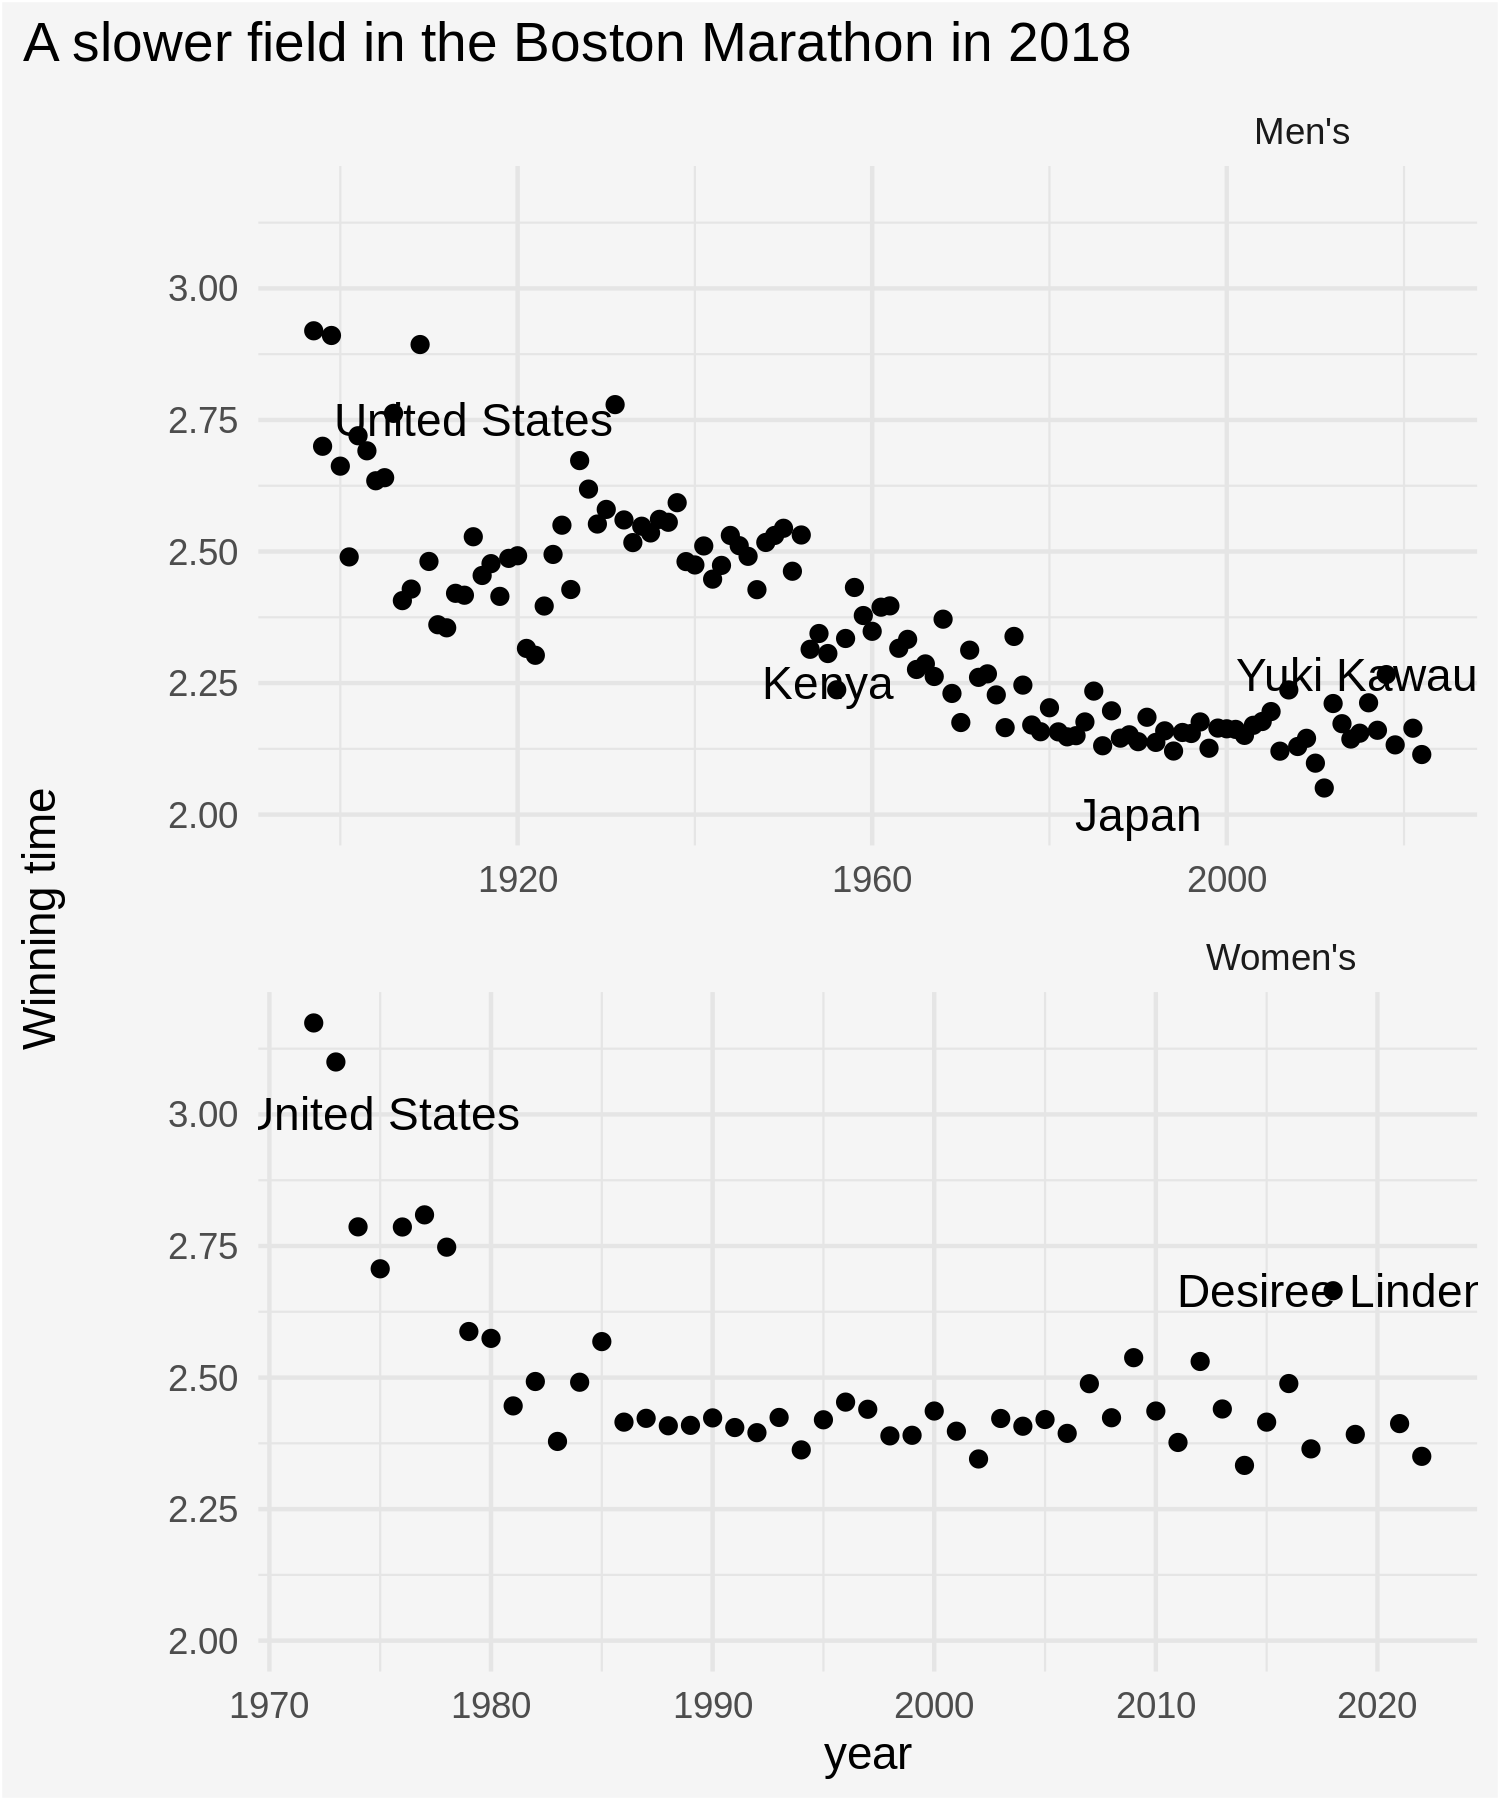

In [53]:


options(repr.plot.width = 5, repr.plot.height = 6)

p = ggplot(df.marathon, aes(x = year, y = race.time)) + 
    geom_point() +
    geom_text(data = country_names, aes(label = country)) +
    geom_text(data = winners_2018, aes(label = name)) +
    facet_wrap(~MF, ncol = 1, scales = 'free_x') +
    labs(title = 'A slower field in the Boston Marathon in 2018', y = 'Winning time') + 
    theme(strip.text = element_text(hjust = 0.9),
          plot.title.position = 'plot',
          plot.background = element_rect(fill = '#F5F5F5'),
          panel.background = element_rect(fill = '#F5F5F5'),
          strip.background = element_blank(),
          panel.grid = element_line(color = 'grey90'),
          axis.ticks = element_blank(),
          axis.title.y = element_text(margin = margin(r = 25)))

p

<center>
    <img src="https://fivethirtyeight.com/wp-content/uploads/2018/04/wezerek-marathon-0416-13.png"
         style="width: 600px;"/>
</center>

Preview the data (i.e. `df.marathon`).

In [25]:
df.marathon |>head()

year,name,country,time,race.time,MF,country.simple
<int>,<chr>,<chr>,<Period>,<dbl>,<chr>,<chr>
2022,Evans Chebet,Kenya,2H 6M 51S,2.114167,Men's,Kenya
2021,Benson Kipruto,Kenya,2H 9M 51S,2.164167,Men's,Kenya
2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia


Fill in the table below:

| chart property | column name |
| --- | --- |
| x value | year |
| y value | ? |
| color | ? |
| facet value | ? |

Make note of other aesthetic decisions. 
- What's the y-axis title?
- Do the two charts share the same x-axis bounds?
- Is there a legend?

Code your version of the chart below.

What else might you visualize with this data? (e.g. What about totaling the winners from each country?)